In this notebook we show a minimal example of how to add constant shear to each galaxy in a blend using BTK.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import sys

import btk
import btk.plot_utils
import btk.survey
import btk.draw_blends
import btk.catalog
import btk.sampling_functions
import astropy.table

In [ ]:
stamp_size = 24.0
seed = 0
catalog_name = "../data/sample_input_catalog.fits"
catalog = btk.catalog.CatsimCatalog.from_file(catalog_name)
sampling_function = btk.sampling_functions.DefaultSampling(stamp_size=stamp_size, seed=seed, max_number=5, min_number=3)
sampling_function_shear = btk.sampling_functions.DefaultSamplingShear(stamp_size=stamp_size,
shear=(0.5,0),seed=seed, max_number=5, min_number=3) # exaggerated shear value
survey = btk.survey.get_surveys("LSST")

## Unsheared Images

Generating blends for LSST survey:   0%|          | 0/100 [00:00<?, ?it/s]

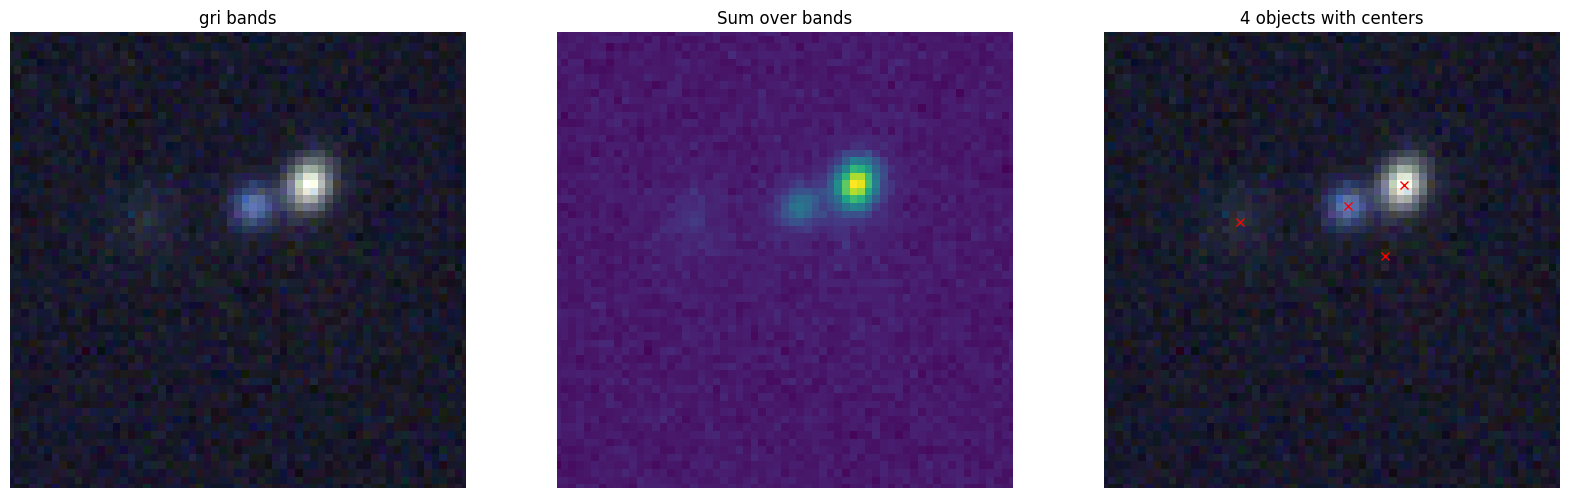

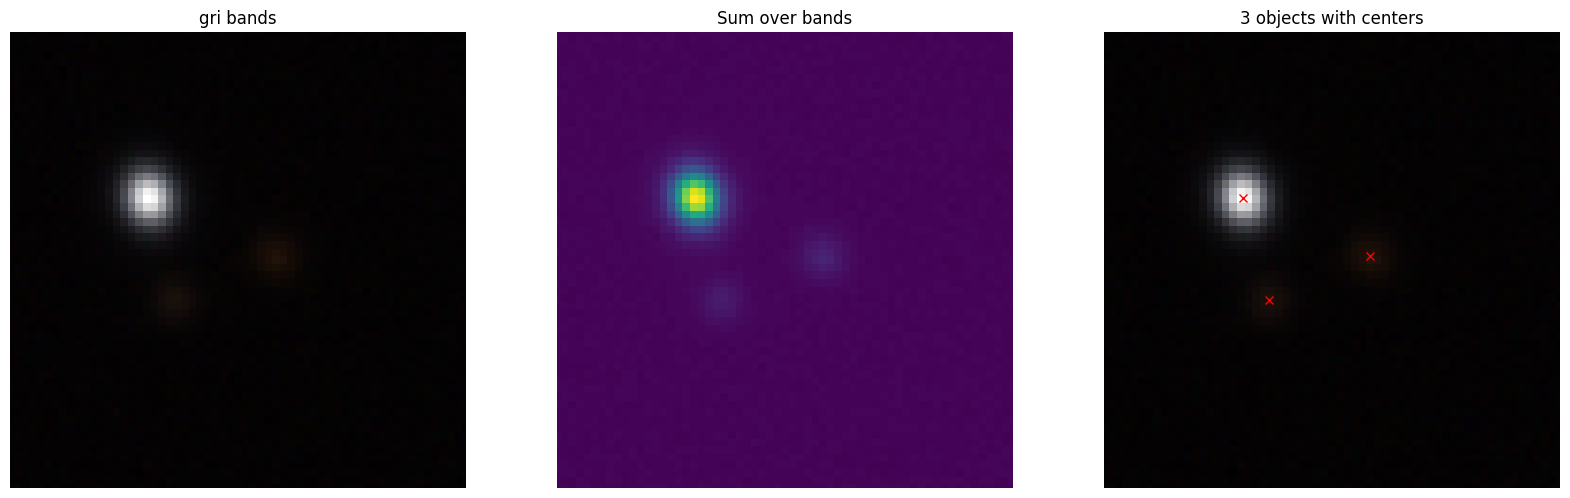

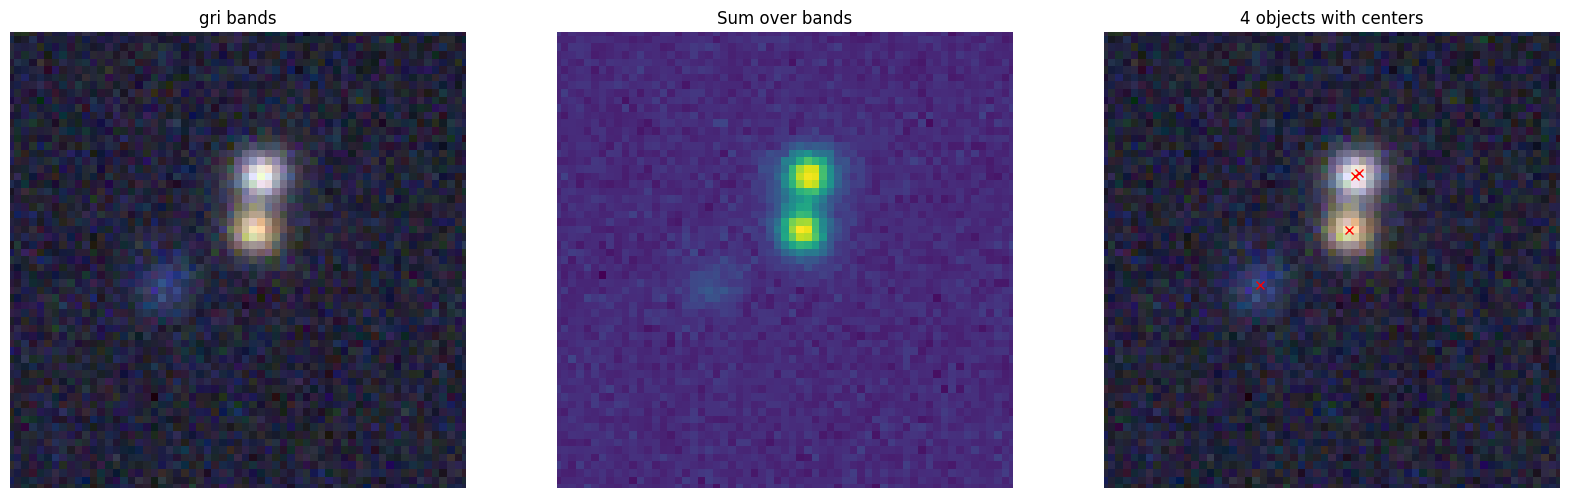

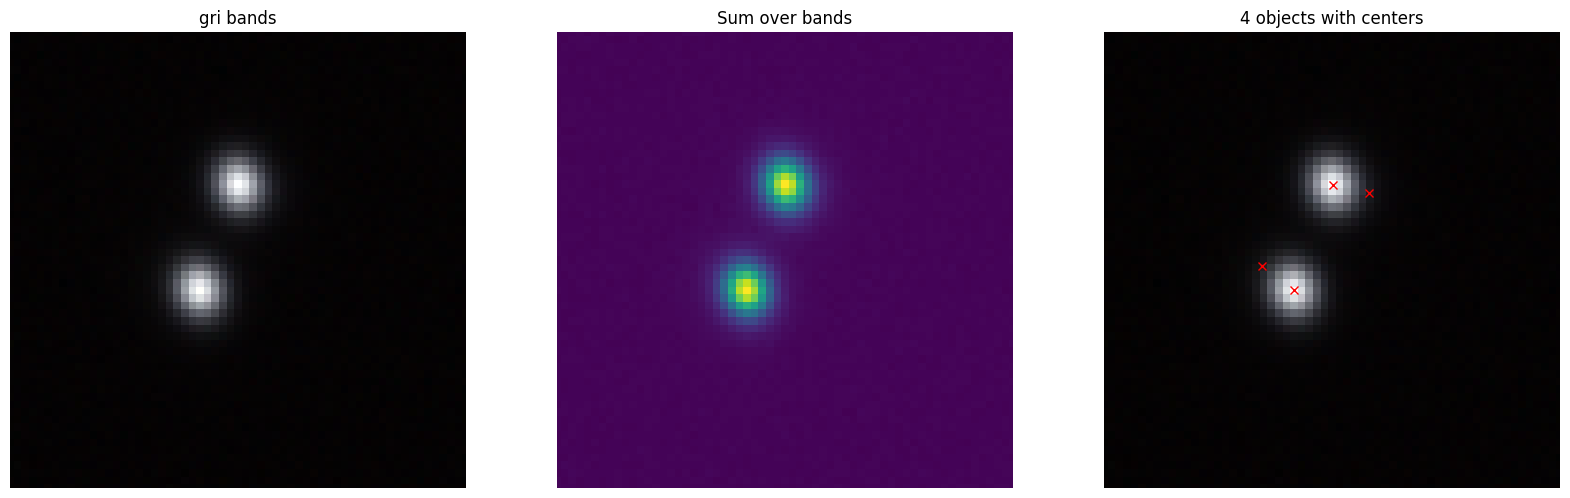

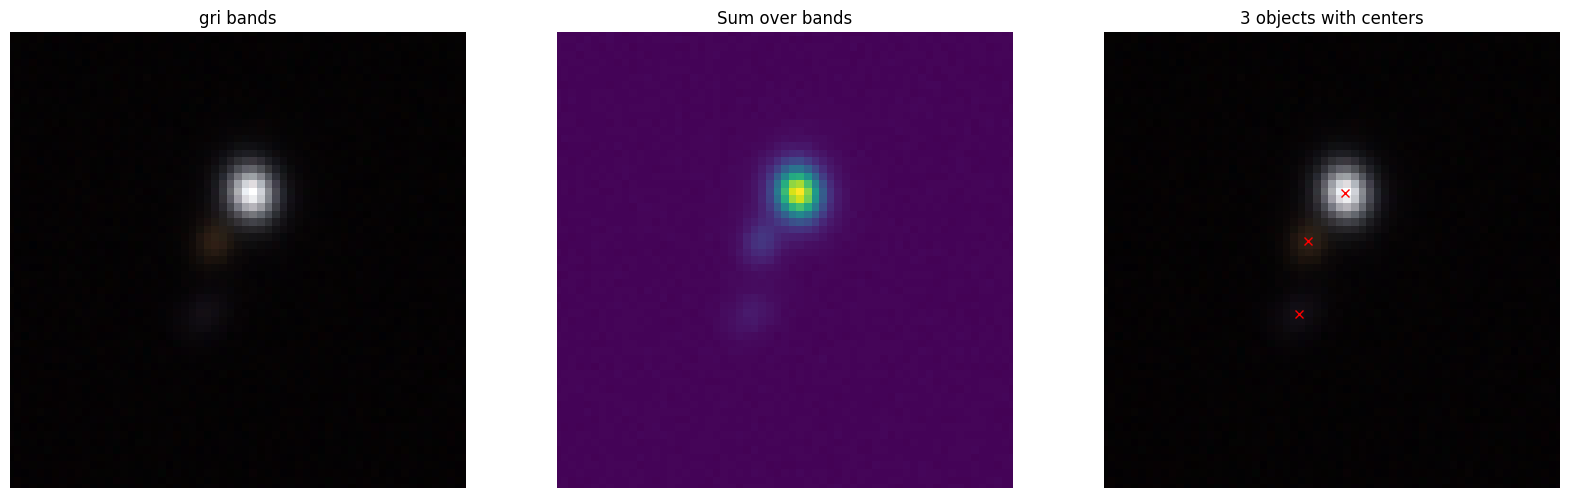

In [ ]:
draw_generator = btk.draw_blends.CatsimGenerator(
    catalog,
    sampling_function,
    survey,
    batch_size=100,
    stamp_size=stamp_size,
    cpus=1,
    add_noise='all',
    seed=seed,
    apply_shear=False
)

batch = next(draw_generator)
blend_images = batch['blend_images']
blend_list = batch['blend_list']
btk.plot_utils.plot_blends(blend_images[:5], blend_list[:5], limits=(30,90))

## Same galaxies but sheared

Generating blends for LSST survey:   0%|          | 0/100 [00:00<?, ?it/s]

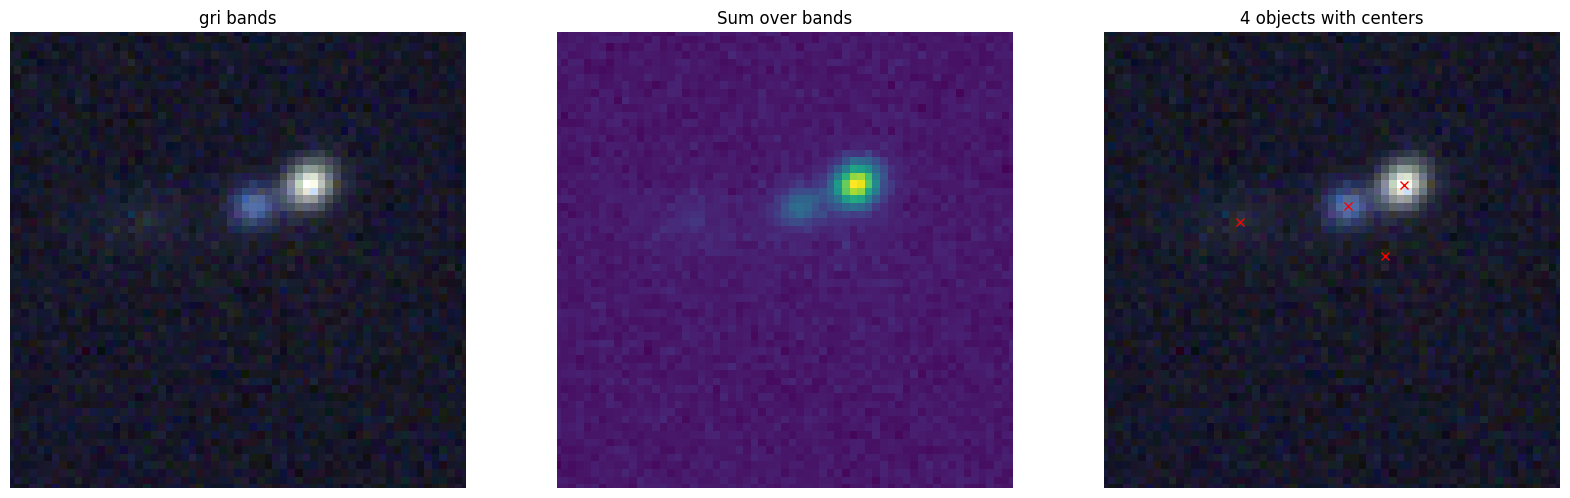

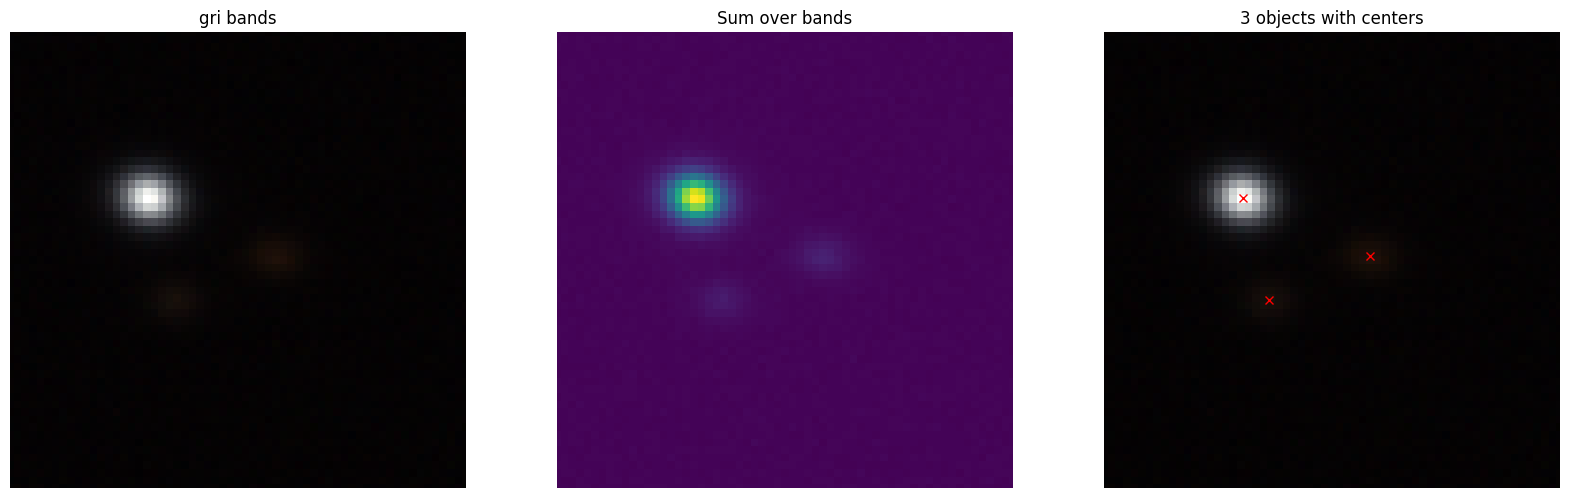

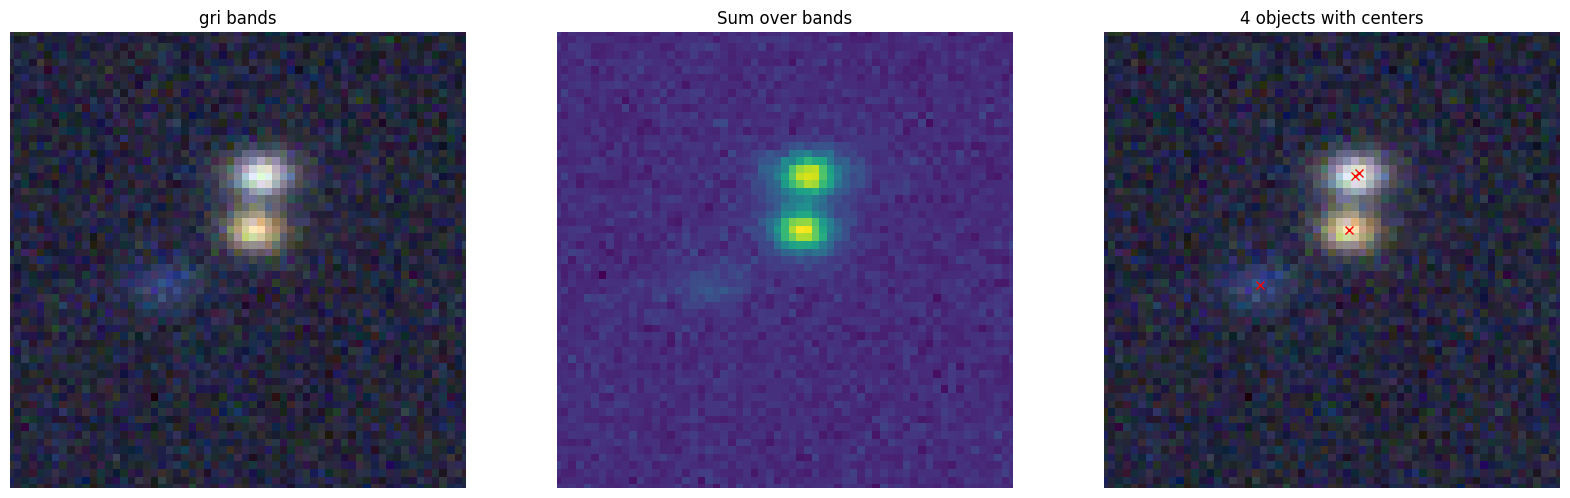

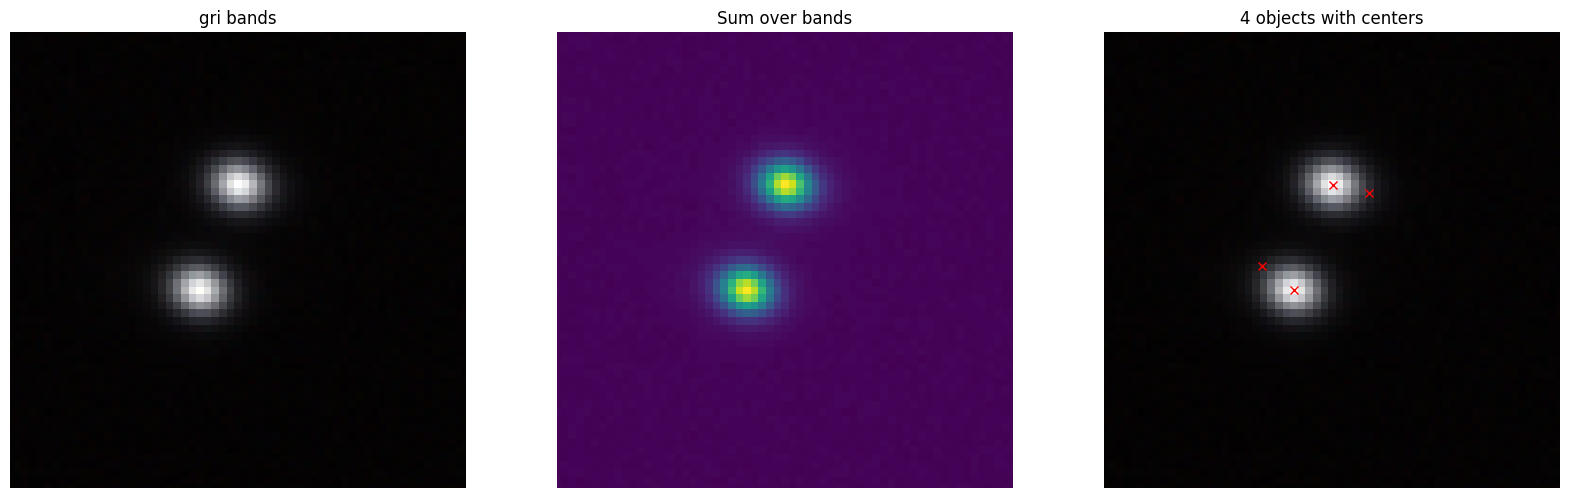

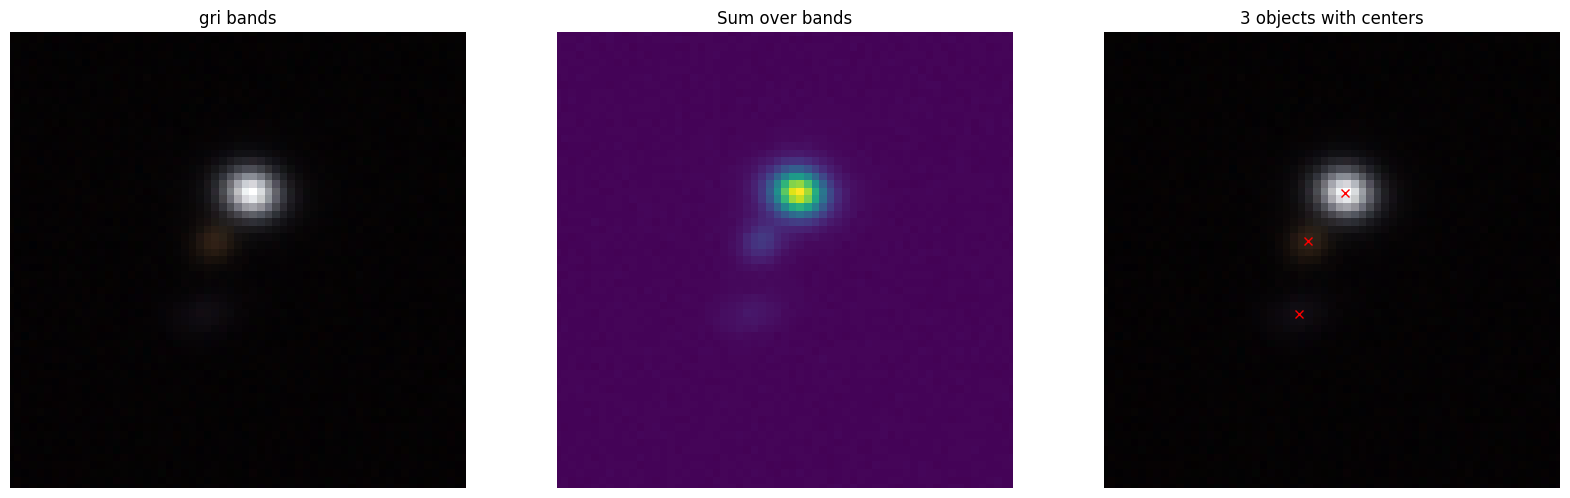

In [ ]:
# sheared images
draw_generator = btk.draw_blends.CatsimGenerator(
    catalog,
    sampling_function_shear,
    survey,
    batch_size=100,
    stamp_size=stamp_size,
    cpus=1,
    add_noise='all',
    seed=seed,
    apply_shear=True
)

batch = next(draw_generator)
blend_images = batch['blend_images']
blend_list = batch['blend_list']
btk.plot_utils.plot_blends(blend_images[:5], blend_list[:5], limits=(30,90))